In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df.describe

<bound method NDFrame.describe of             id  carat        cut color clarity  depth  table     x     y  \
0            0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33   
1            1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12   
2            2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73   
3            3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41   
4            4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39   
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
0       4.55  13619  
1       5

In [7]:
df.duplicated().sum()

0

In [9]:
#segregate numerical and categorical columns
numer_cols = df.columns[df.dtypes!="object"]
categ_cols = df.columns[df.dtypes=="object"]
print("Numerical columns are",numer_cols)
print("Categorical columns are ",categ_cols)

Numerical columns are Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns are  Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
df[categ_cols].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [11]:
df[numer_cols].describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [12]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [13]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

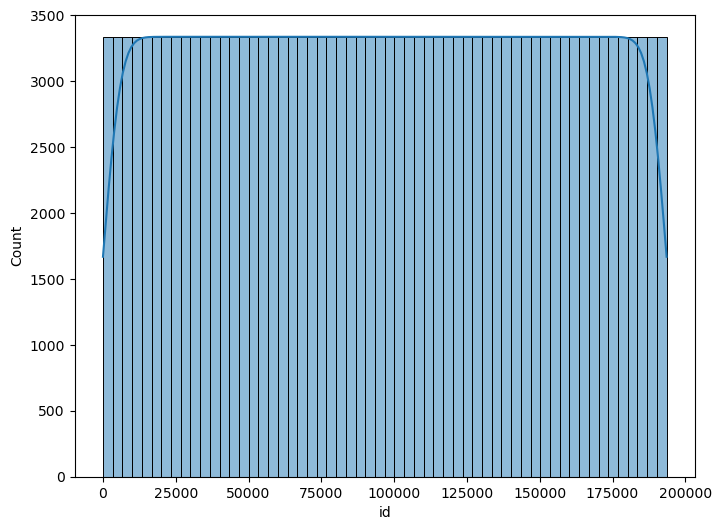

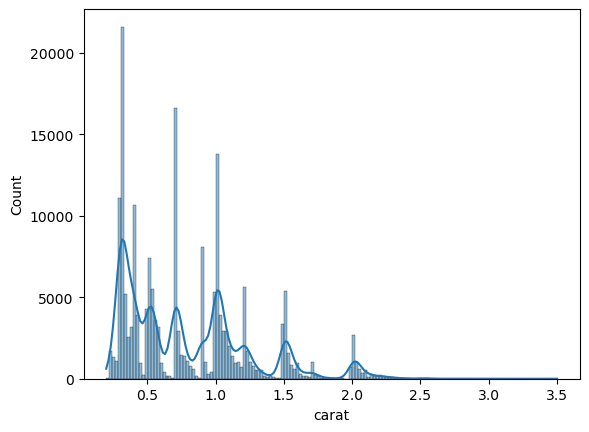

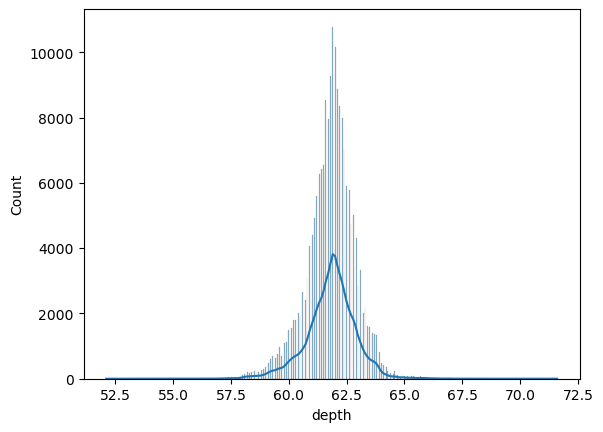

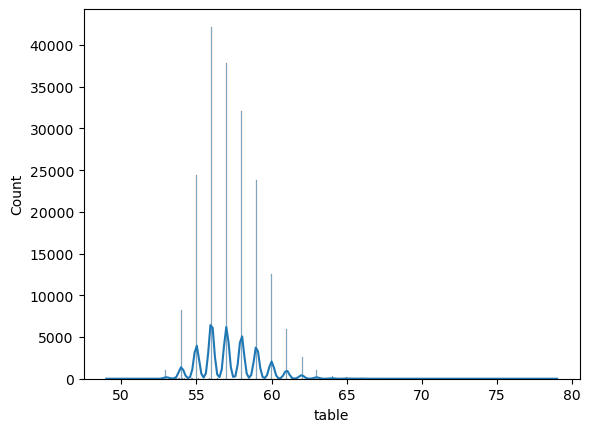

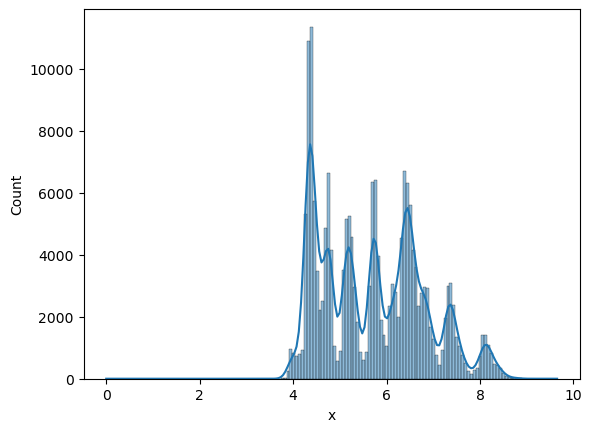

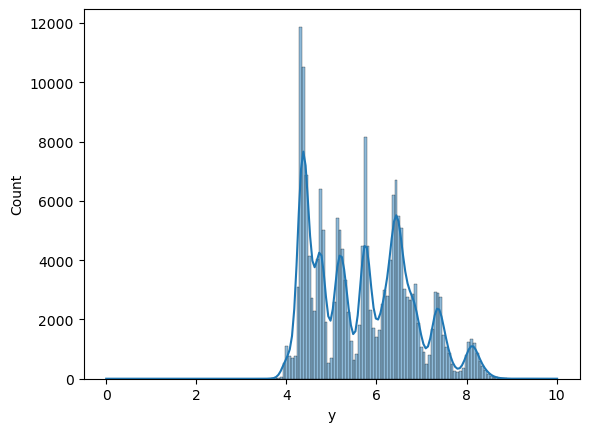

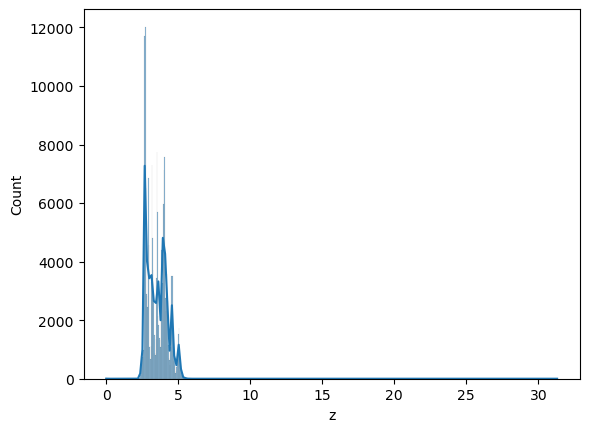

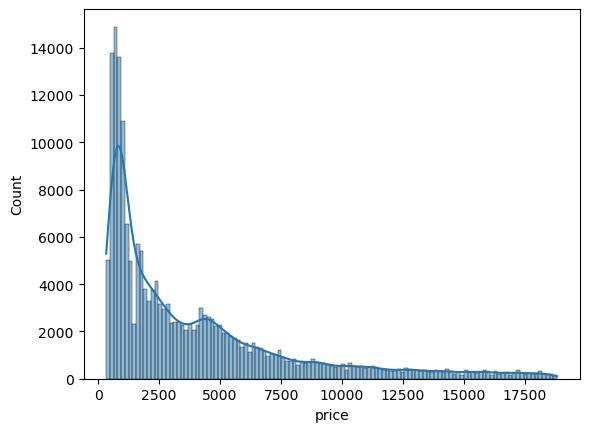

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
x=0
for i in numer_cols:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

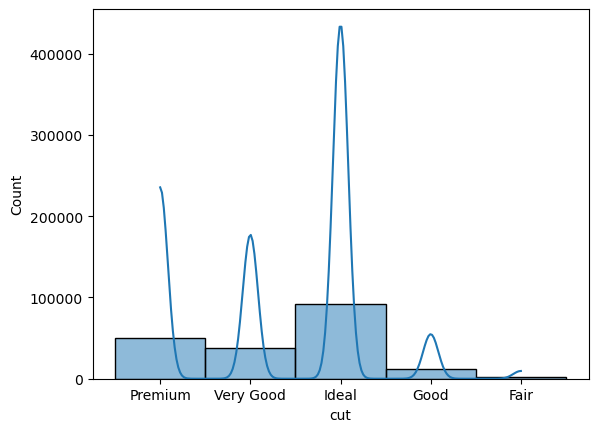

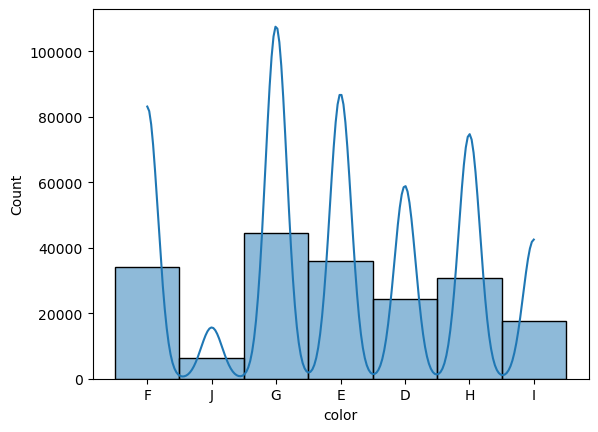

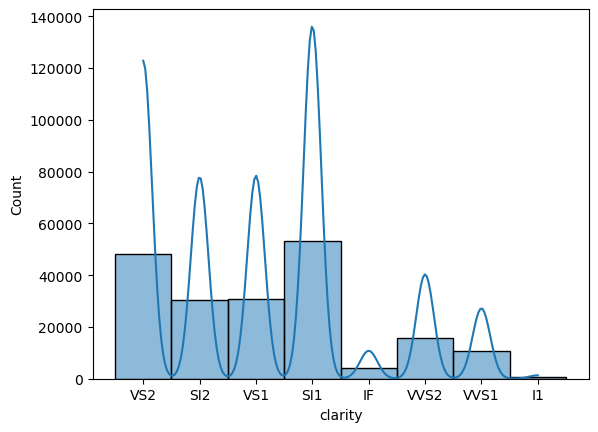

In [15]:
x=0
for i in categ_cols:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

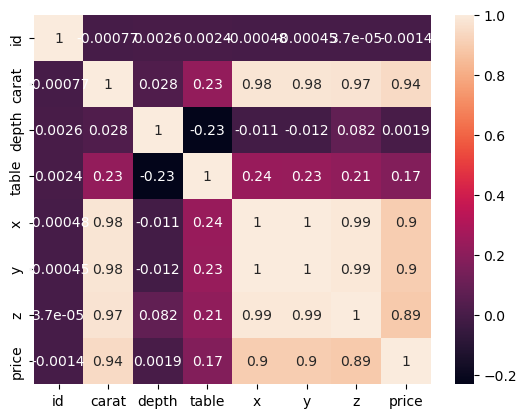

In [17]:
sns.heatmap(df[numer_cols].corr(),annot=True)

In [18]:
df = df.drop(labels=['id'],axis=1)

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [20]:
df.drop(labels='price',axis=1)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [26]:
Y = df[['price']]

In [27]:
Y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [28]:
X = df.drop(labels='price',axis=1)

In [29]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [30]:
Y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [43]:
#segregation of numerical and categorical columns in parameters (X)
numerical_column = X.select_dtypes(exclude='object').columns
categorical_column = X.select_dtypes(include='object').columns

In [44]:
features = [col for col in numerical_column]
features

['carat', 'depth', 'table', 'x', 'y', 'z']

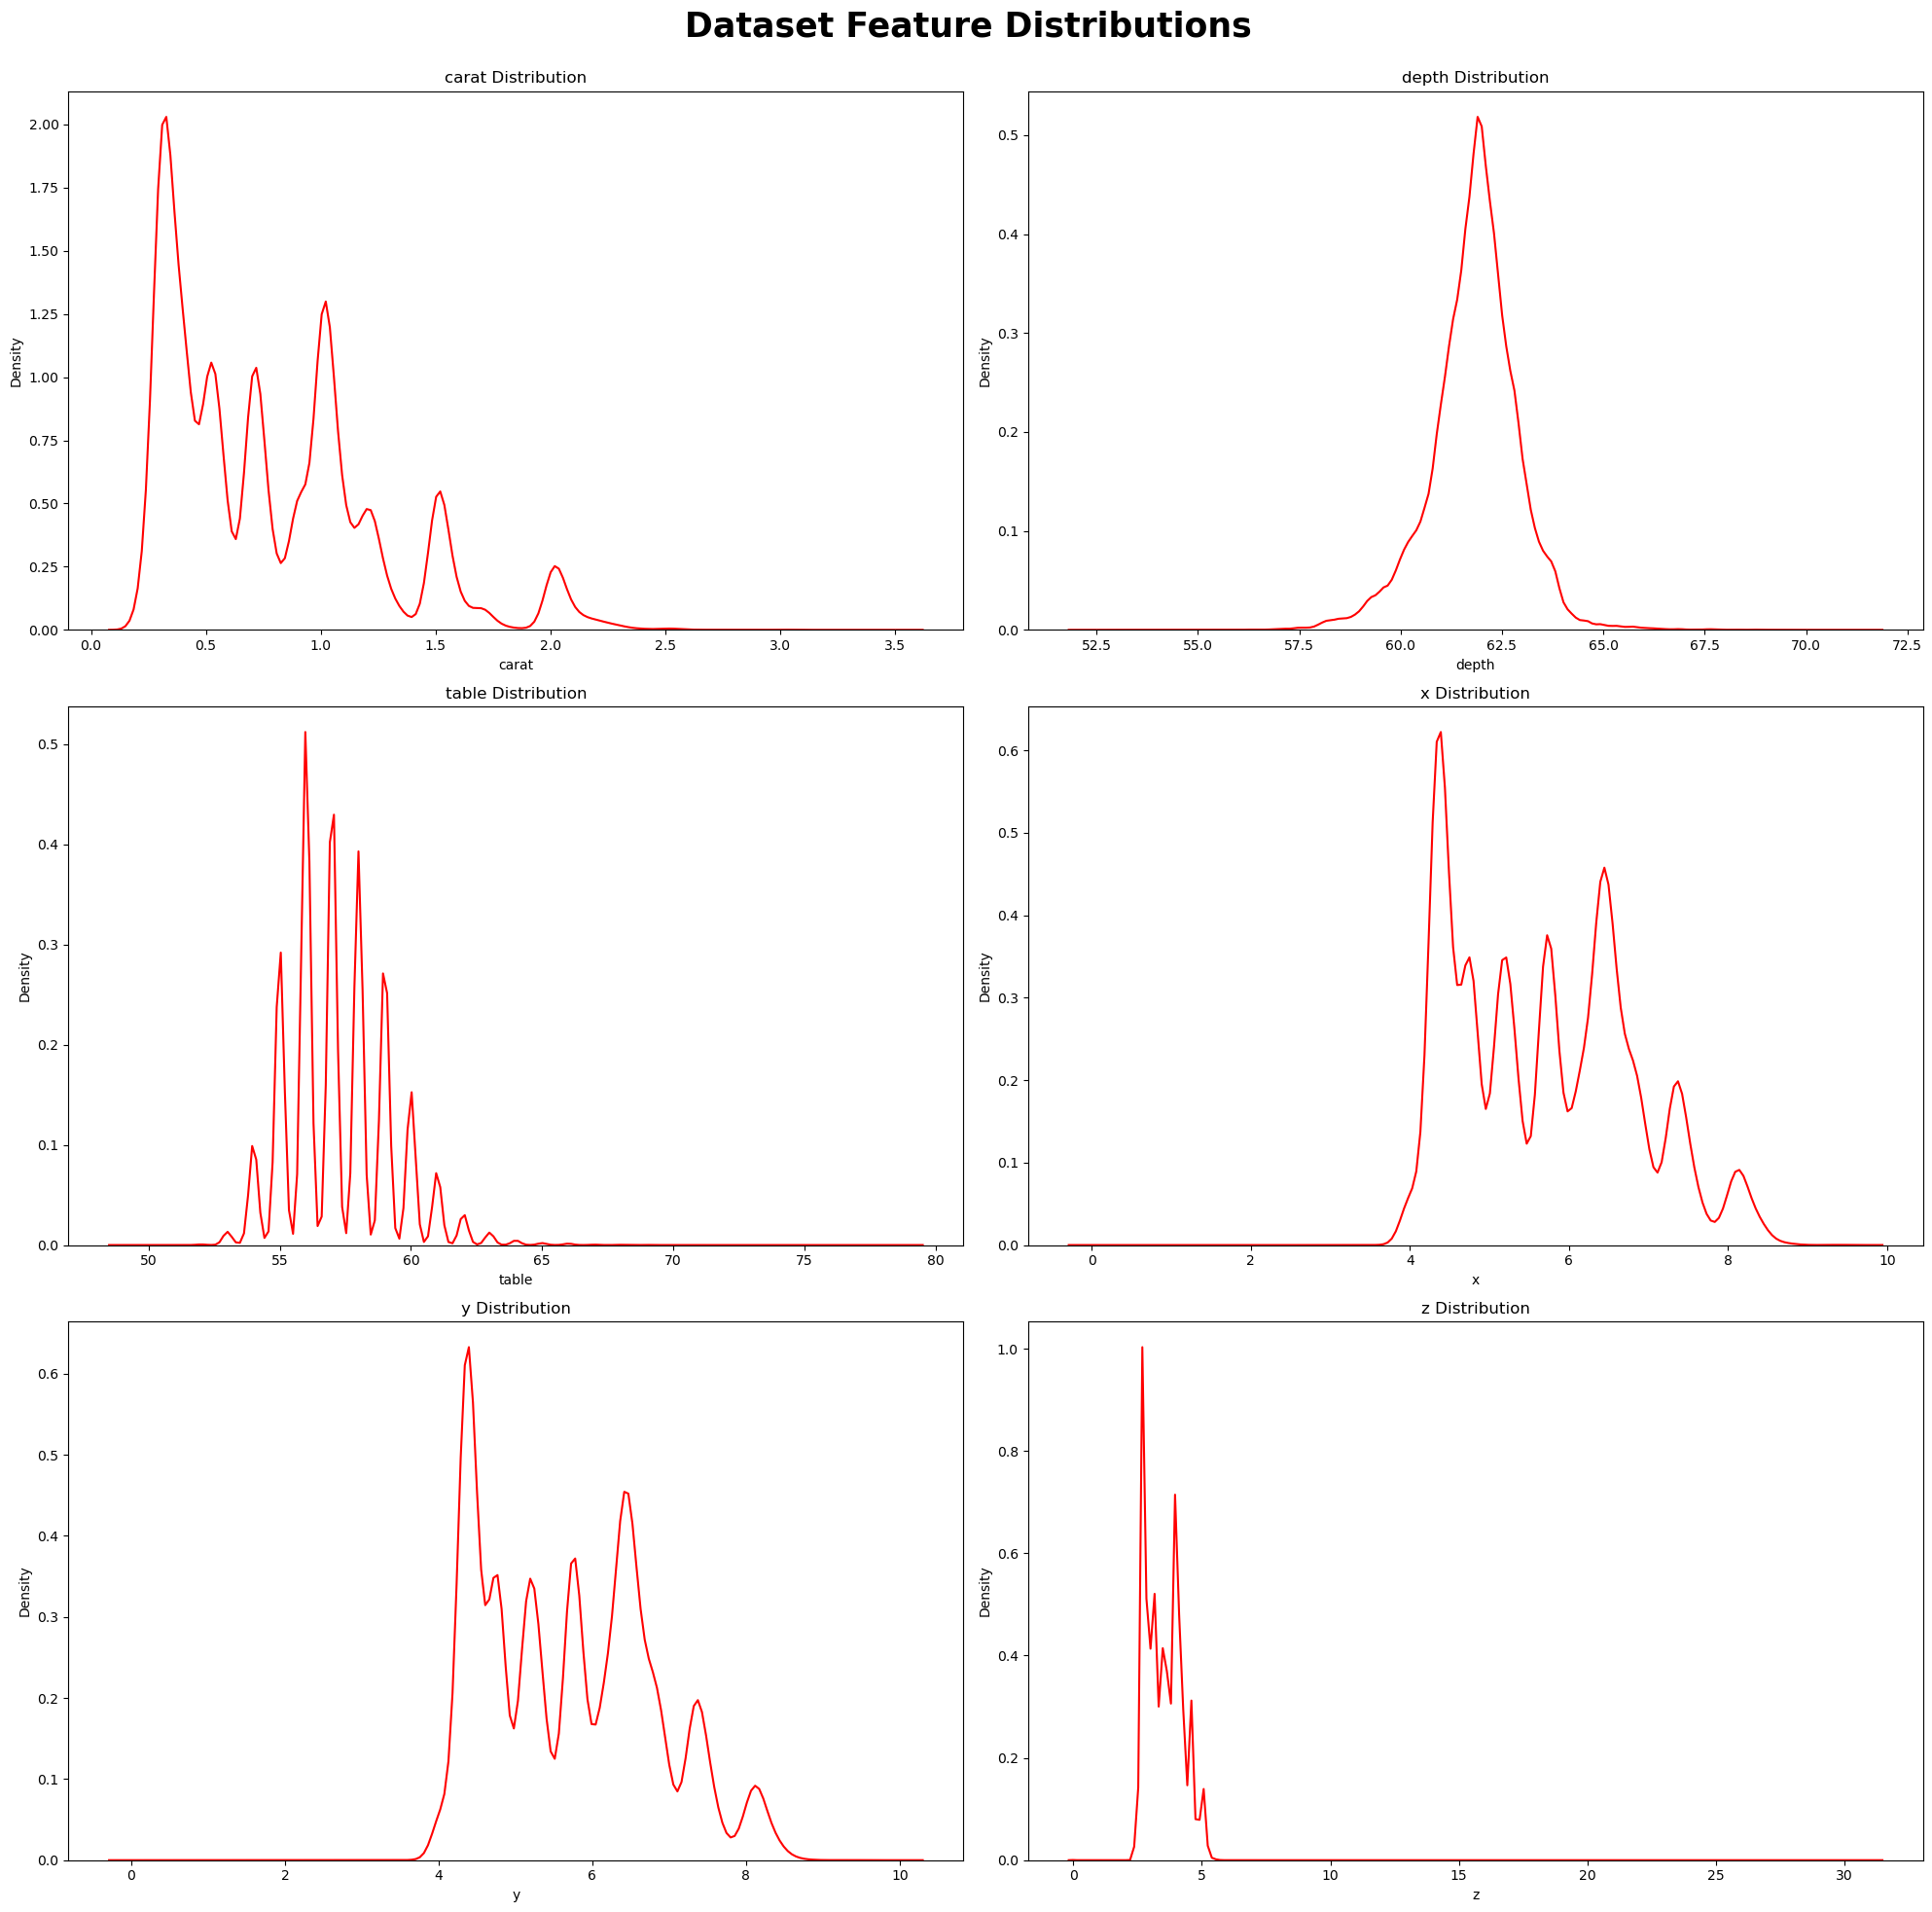

In [39]:
#visuallizing the all numerical features

n_cols = 2
n_rows = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 20))
ax = ax.flatten()
    
for i, column in enumerate(features):
    plot_axes = [ax[i]]
    #sns.histplot(df[column], kde = True, bins = 10, ax = ax[i])
    sns.kdeplot(df[column], ax = ax[i], color='Red')
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Dataset Feature Distributions\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()

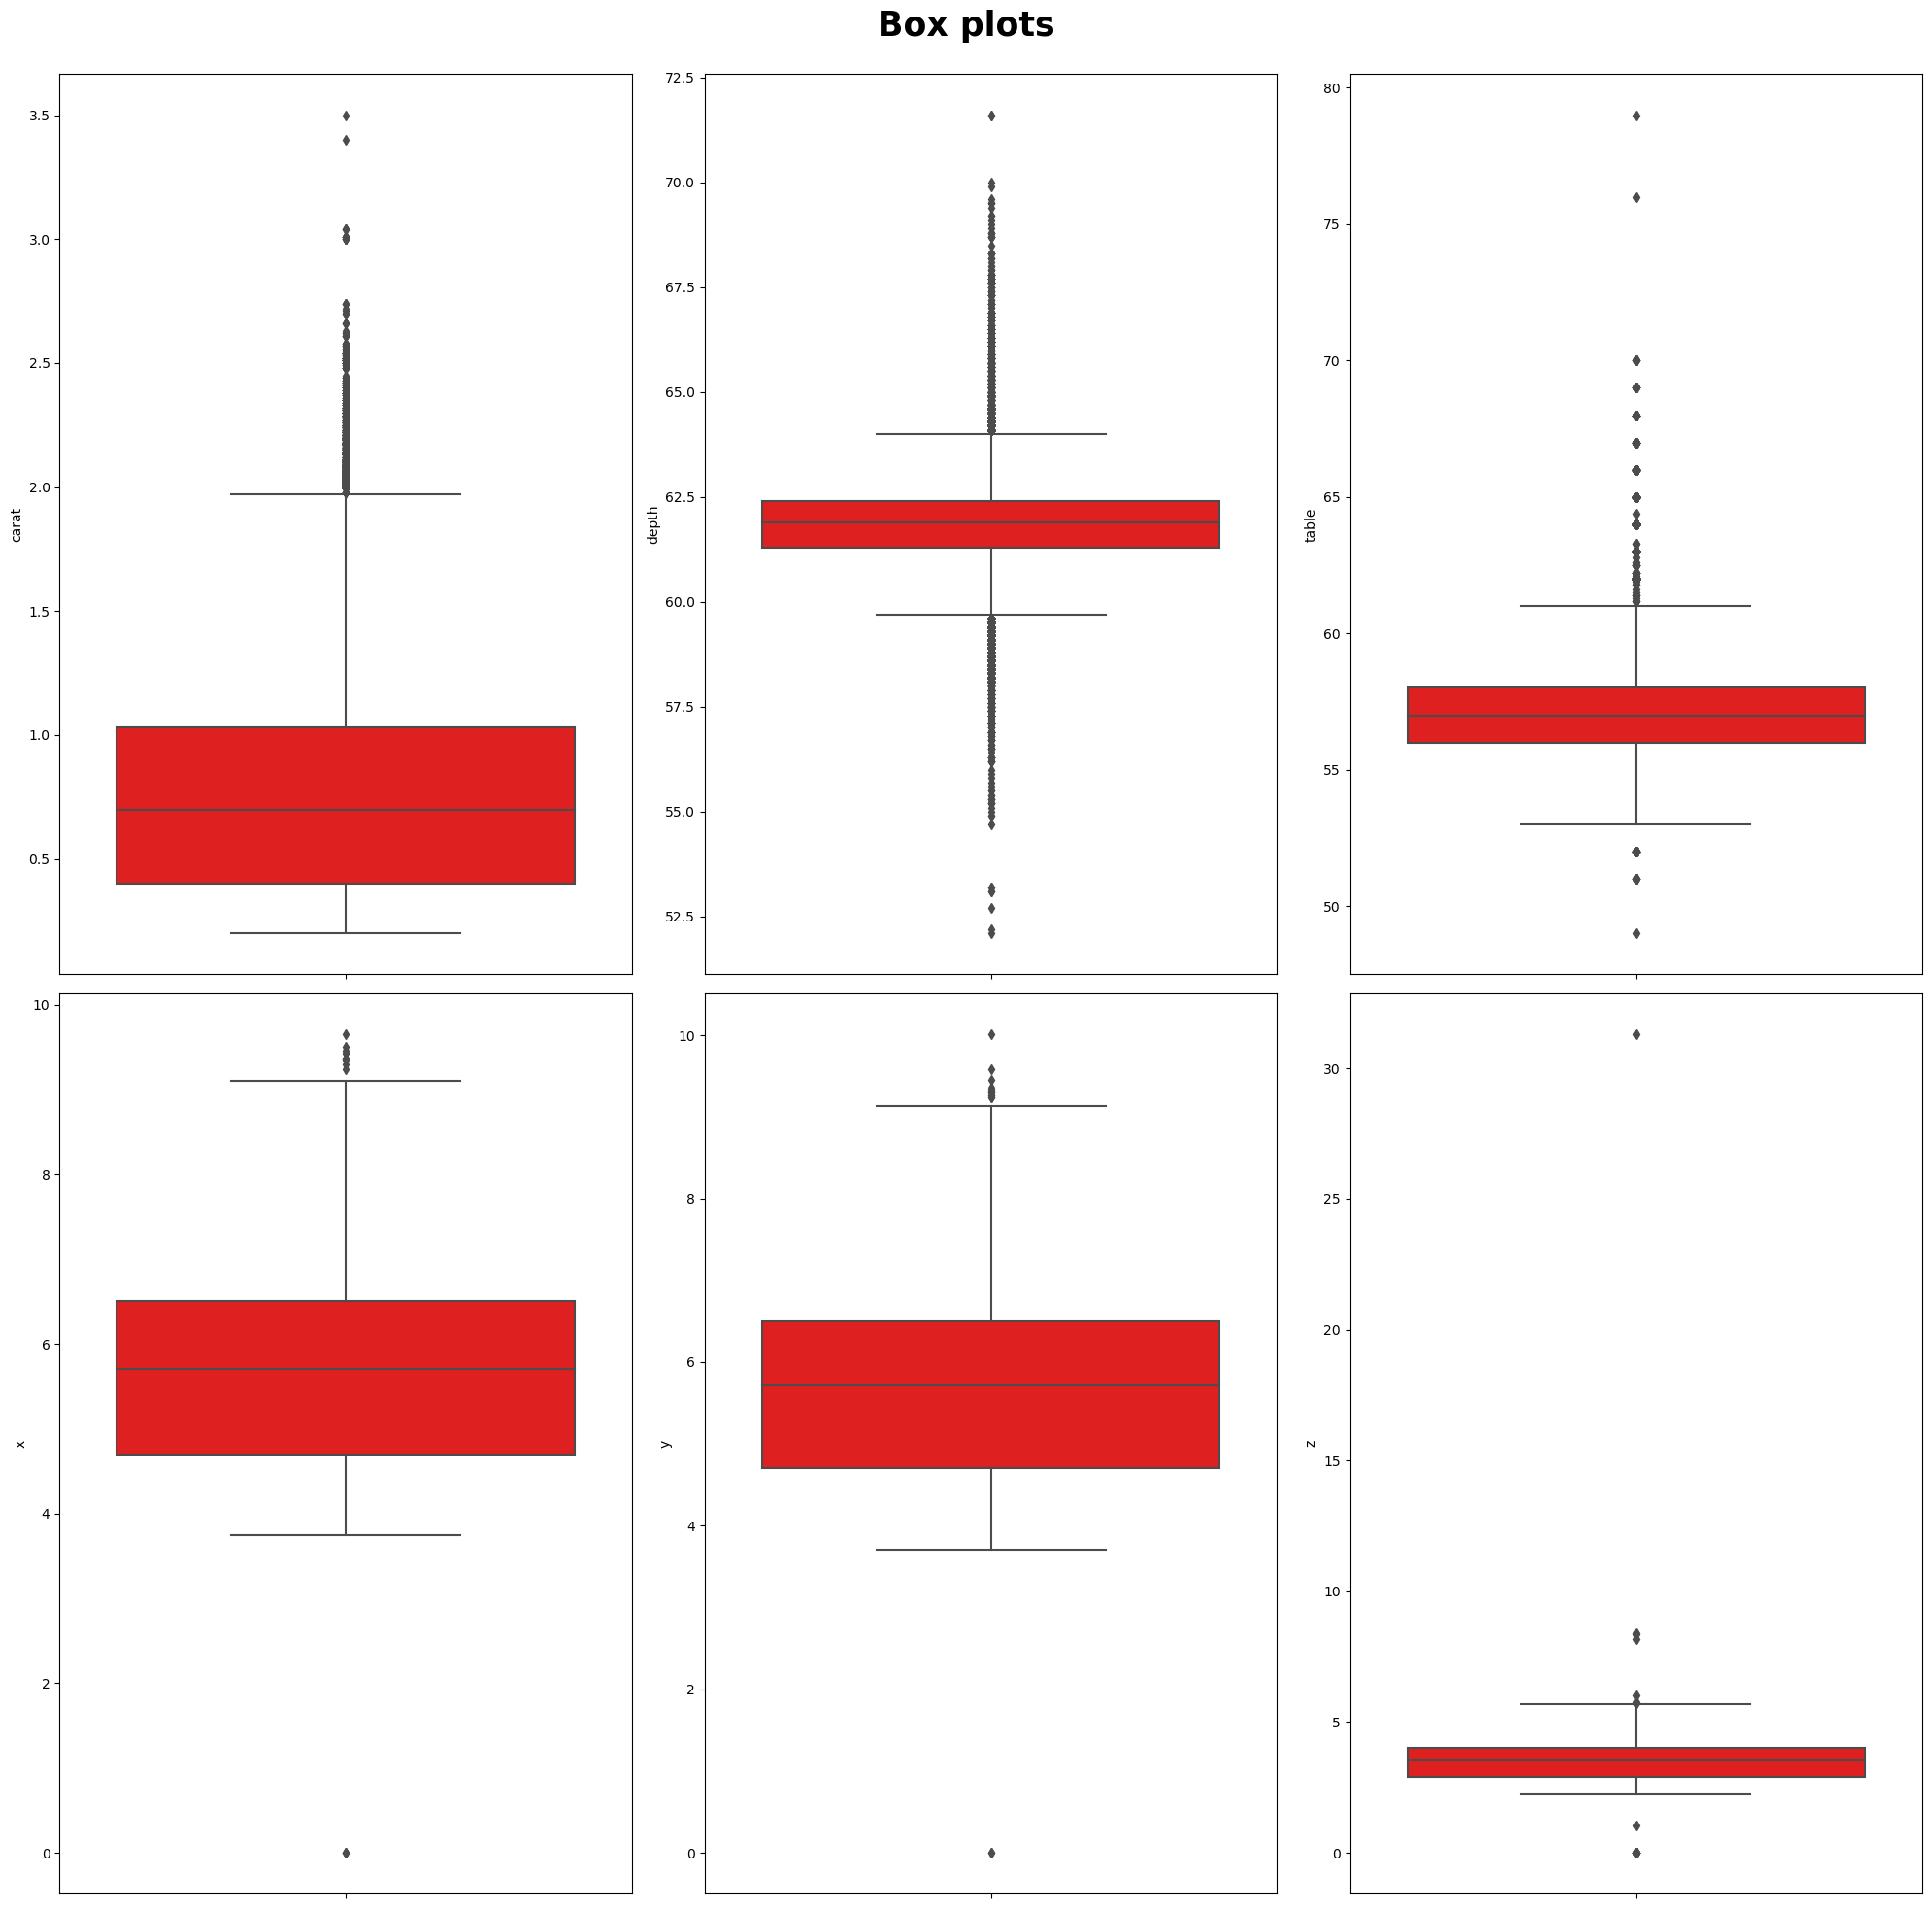

In [45]:
# Checking outliers using box plot

# create box plots
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,20))
index = 0
ax = ax.flatten()

for col in features:
    sns.boxplot(y=col, data=df, ax=ax[index], color='r')
    plt.subplots_adjust(wspace = .5)
    index += 1
    
fig.suptitle(f'Box plots\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()

In [46]:
categorical_column

Index(['cut', 'color', 'clarity'], dtype='object')

In [48]:
cat_features = [col for col in categorical_column]
cat_features

['cut', 'color', 'clarity']

In [49]:
def plot_count_chart(col:str):
    fig = plt.figure(figsize=(12, 5), dpi=120)
    s = sns.countplot(data = df, x = col, order = df[col].value_counts().index)
    fig.suptitle(col, ha="center",  fontweight="bold", fontsize=14)
    for container in s.containers:
        s.bar_label(container, c='black', size=12);
        s.set_ylabel(''); s.spines['top'].set_visible(False),
        s.set_xlabel(''); s.spines['right'].set_visible(False),
        s.spines['left'].set_visible(False)
        #plt.tick_params(labelleft=False)

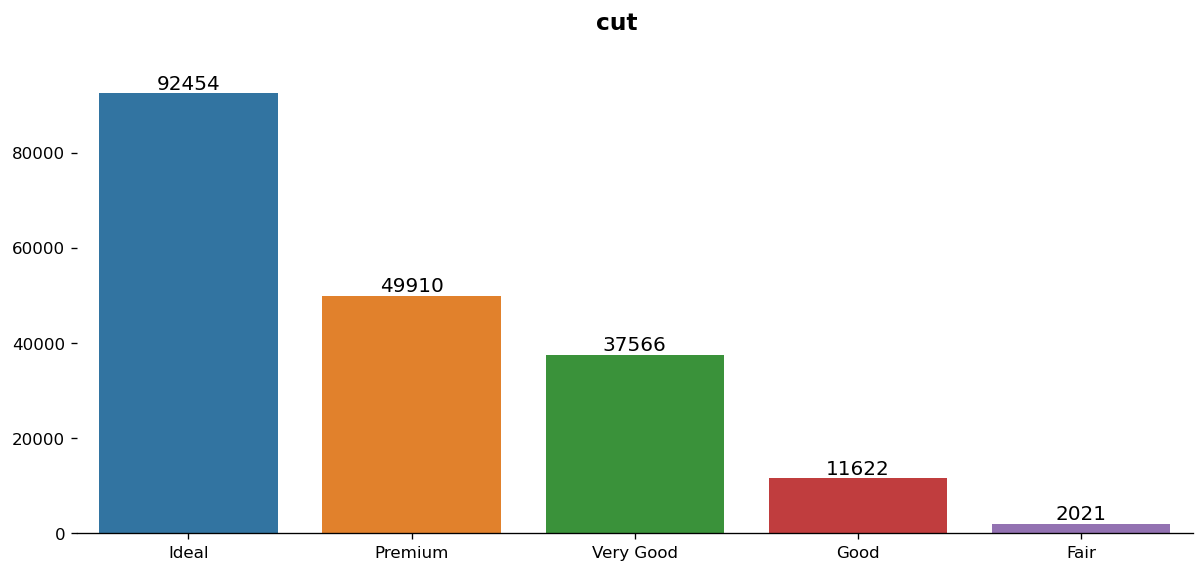

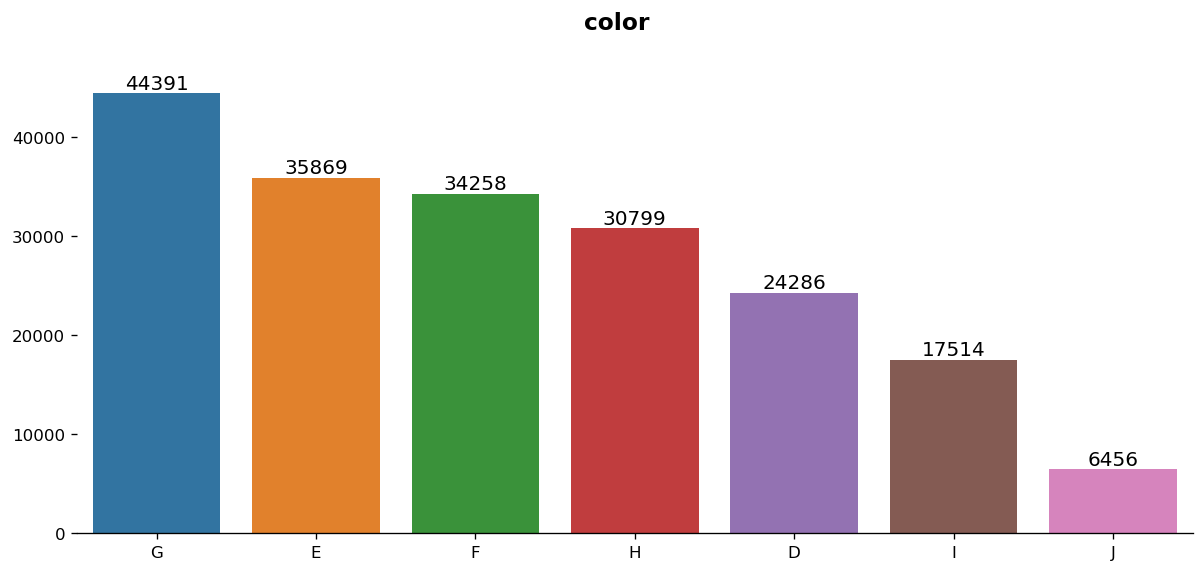

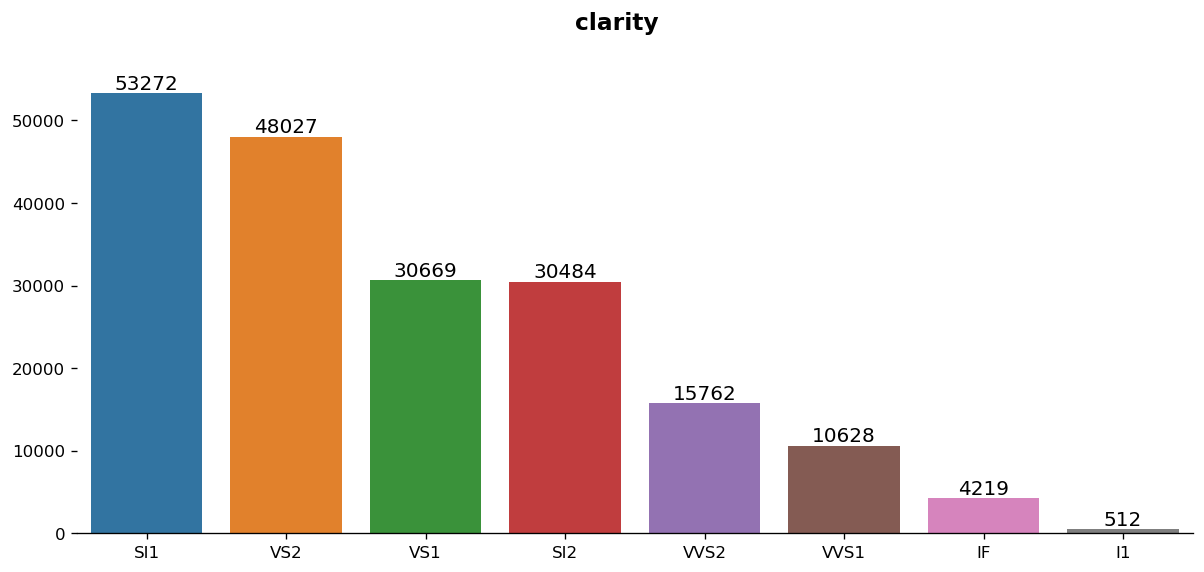

In [50]:
for col in cat_features:
    plot_count_chart(col)

In [52]:

numerical_column

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

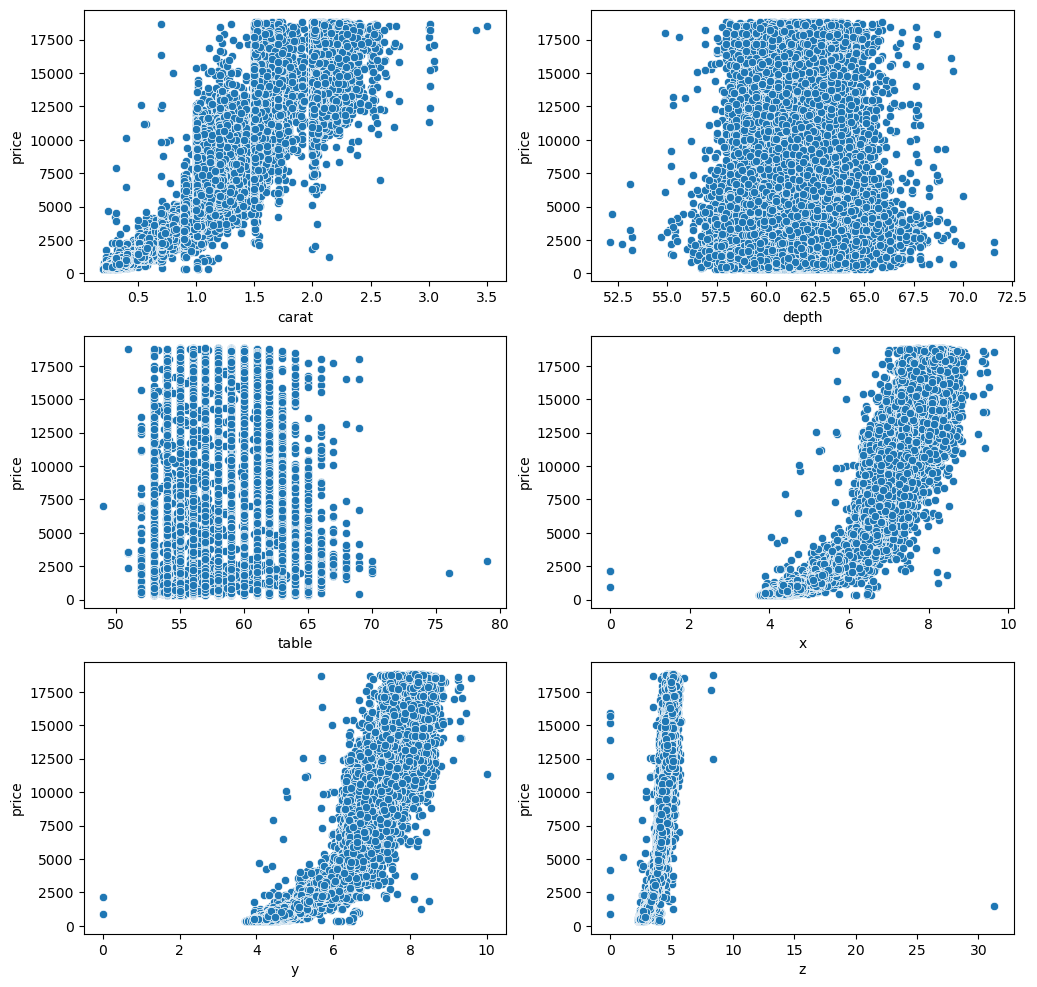

In [54]:
target = "price"
index, rows, columns = 0,3,2

fig, axs = plt.subplots(nrows=rows, ncols=columns,figsize=(12,12))
for row in range(rows):
    for col in range(columns):
        if numerical_column[index] == target:
            pass
        
        sns.scatterplot(x = numerical_column[index], y = target, data = df, ax=axs[row][col])
        #sns.lmplot(x = numerical_columns[index], y = target, data = df, ax=axs[row][col])
        index += 1
        

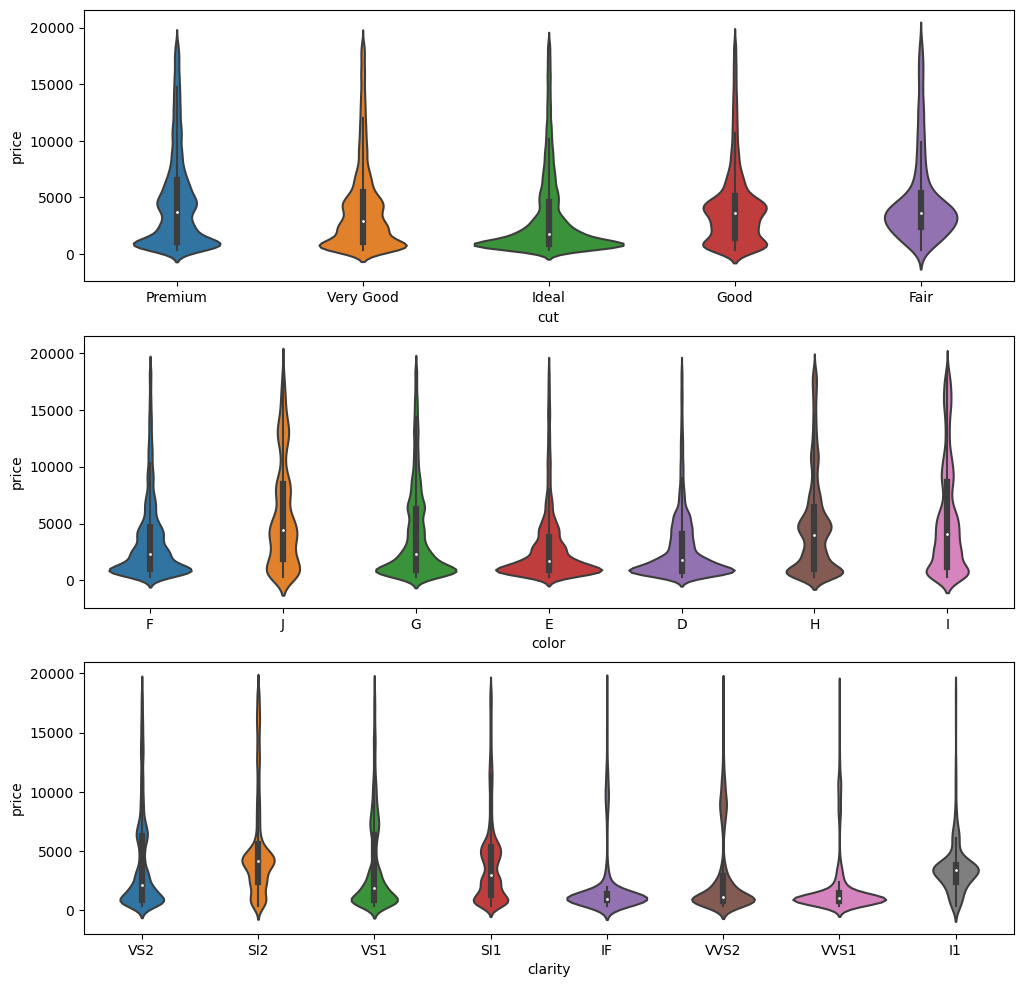

In [56]:
target = "price"
index, rows = 0,3
fig, axs = plt.subplots(nrows=rows, figsize=(12,12))
for row in range(rows):
    sns.violinplot(x = categorical_column[index], y = target, data =df,  ax=axs[row])
    index += 1

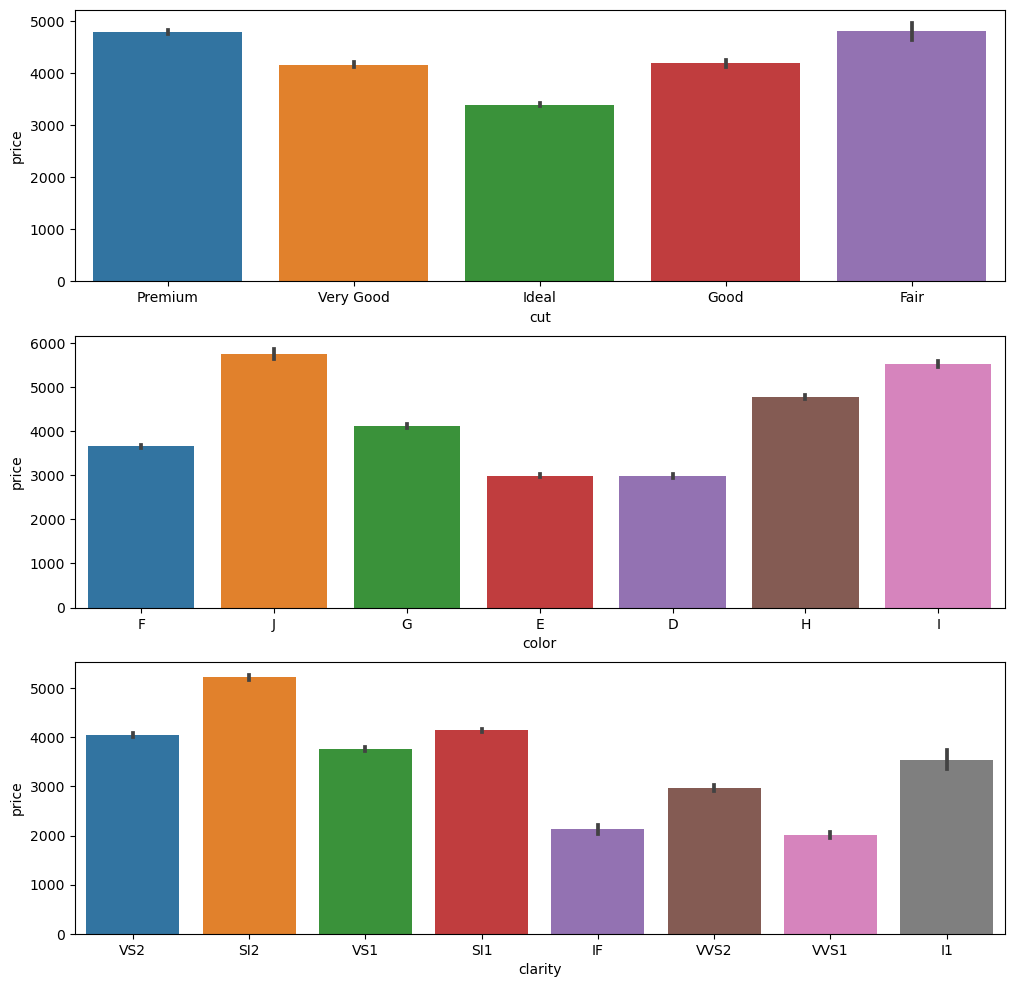

In [58]:
target = "price"
index, rows = 0,3
fig, axs = plt.subplots(nrows=rows, figsize=(12,12))
for row in range(rows):
    sns.barplot(x = categorical_column[index], y = target, data =df,  ax=axs[row])
    index += 1

In [60]:
c = df[numerical_column].corr()
c

,carat,depth,table,x,y,z
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000


<Axes: >

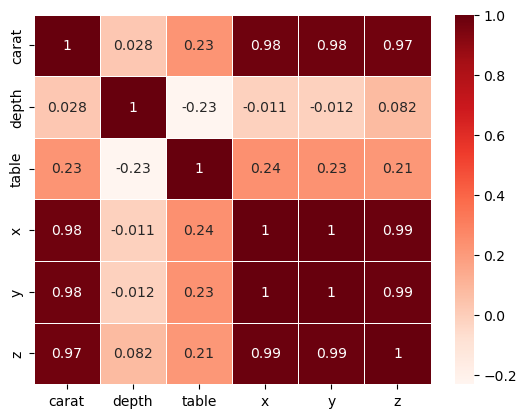

In [62]:
mask = np.zeros_like(c)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(c, mask = mask, linewidths=.5, cmap='Reds', annot=True)